<a href="https://colab.research.google.com/github/Fiarma5233/Data-Science/blob/master/Lambo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''Prediction des prix de vente  des lambo en fonction de certaines caracteristiques
Apprentissage supervise
Algo: Regression Lineaire'''

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# lecture fichier csv

df = pd.read_excel('/content/drive/MyDrive/Kaggle/LamboData.xlsx')

In [ ]:
df.head()

,Year,Sales,Growth,Open,High,Low,Close
0,2006,2087,NaN,5.50,11.30,5.50,11.30
1,2007,2406,15.285098,11.80,26.30,11.80,23.05
2,2008,2430,0.997506,22.43,51.13,22.00,35.90
3,2009,1515,-37.654321,34.48,37.50,11.18,11.18
4,2010,1302,-14.059406,10.75,15.38,8.49,14.80


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    18 non-null     int64  
 1   Sales   18 non-null     int64  
 2   Growth  17 non-null     float64
 3   Open    18 non-null     float64
 4   High    18 non-null     float64
 5   Low     18 non-null     float64
 6   Close   18 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 1.1 KB


In [ ]:
df.isnull().sum()

Year      0
Sales     0
Growth    1
Open      0
High      0
Low       0
Close     0
dtype: int64

In [ ]:
# data cleaning
df.dropna(inplace=True)


In [ ]:
df.isnull().sum()

Year      0
Sales     0
Growth    0
Open      0
High      0
Low       0
Close     0
dtype: int64

In [ ]:
# description
df.describe()

,Year,Sales,Growth,Open,High,Low,Close
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,2015.000000,4449.470588,11.785750,19.561176,25.697647,15.072941,19.612353
std,5.049752,3038.255834,21.049916,6.628256,9.155684,5.009226,6.519647
min,2007.000000,1302.000000,-37.654321,10.750000,15.380000,8.490000,11.180000
25%,2011.000000,2121.000000,1.824292,15.020000,20.000000,11.800000,14.800000
50%,2015.000000,3245.000000,10.355800,19.410000,22.850000,14.030000,19.400000
75%,2019.000000,7430.000000,23.041475,21.960000,26.970000,16.180000,22.170000
max,2023.000000,10112.000000,50.720839,34.480000,51.130000,29.200000,35.900000


In [ ]:
# correlation
df.corr()['Sales']

Year      0.908334
Sales     1.000000
Growth    0.241942
Open      0.143002
High     -0.069109
Low       0.218257
Close    -0.059613
Name: Sales, dtype: float64

<Figure size 75x75 with 0 Axes>

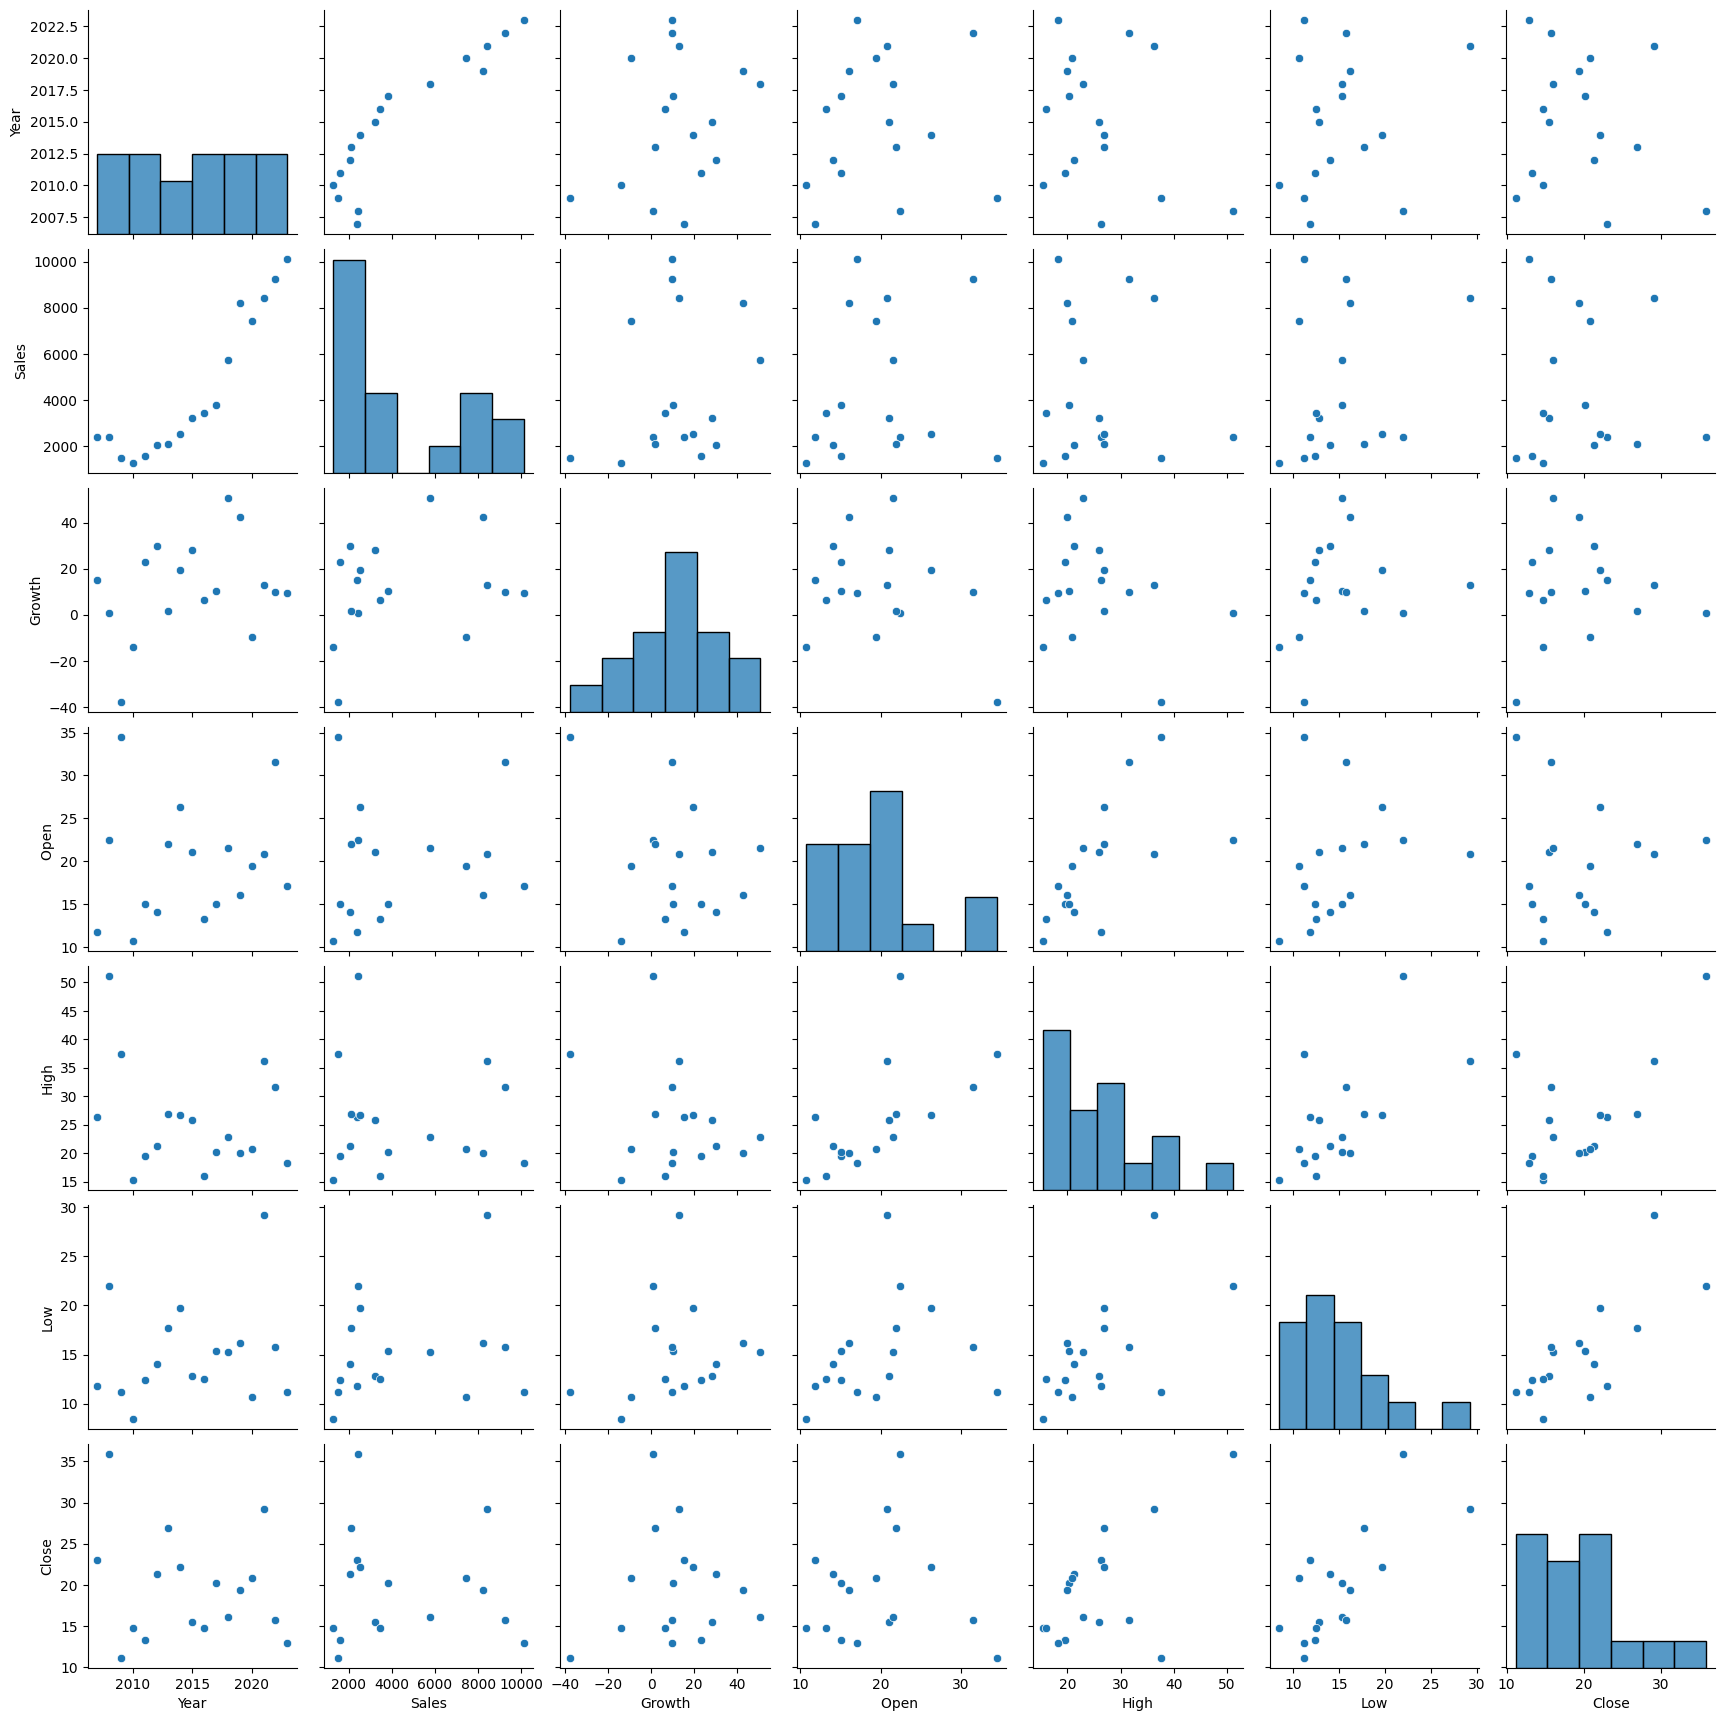

In [ ]:
# visualisation
fig = plt.figure(figsize=(5,5), dpi=15)
sns.pairplot(df)

In [ ]:
# separation des donnees en train and test

# DOnnees d'entrainnement
X = df.drop('Sales', axis=1)
X

,Year,Growth,Open,High,Low,Close
1,2007,15.285098,11.80,26.30,11.80,23.05
2,2008,0.997506,22.43,51.13,22.00,35.90
3,2009,-37.654321,34.48,37.50,11.18,11.18
4,2010,-14.059406,10.75,15.38,8.49,14.80
5,2011,23.041475,15.04,19.58,12.40,13.35
6,2012,30.024969,14.03,21.31,14.03,21.31
7,2013,1.824292,21.96,26.97,17.70,26.97
8,2014,19.283357,26.28,26.80,19.73,22.17
9,2015,28.260870,21.06,25.91,12.84,15.49
10,2016,6.533128,13.21,15.96,12.50,14.77


In [ ]:
# Donnes de test

y = df['Sales']
y

1      2406
2      2430
3      1515
4      1302
5      1602
6      2083
7      2121
8      2530
9      3245
10     3457
11     3815
12     5750
13     8205
14     7430
15     8405
16     9233
17    10112
Name: Sales, dtype: int64

In [ ]:

from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# feature scaling

from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler() # instanciation

In [ ]:
# donnees train mises a l'echelle
x_train_scaled = scaler.fit_transform(X_train, y_train)
x_train_scaled

array([[-0.04356068,  0.99431861,  0.30313929,  0.55981166, -0.19724008,
        -0.43285333],
       [ 1.15435813, -0.79478398,  0.04555605, -0.2734935 , -0.86961085,
         0.73507522],
       [-1.48106326, -2.13324748,  2.39814971,  2.4609941 , -0.71396947,
        -1.37550727],
       [ 0.19602308, -0.03662657, -0.92233252, -1.072351  , -0.30307622,
        -0.59032684],
       [ 1.87310942,  0.105105  , -0.31974383, -0.68522498, -0.71708229,
        -0.98182349],
       [-1.00189574,  0.74666701, -0.63664928, -0.47853906, -0.33420449,
        -0.9008996 ],
       [-0.28314445,  0.56835057,  1.11803902,  0.7058041 ,  1.94749816,
         1.02815092],
       [ 0.43560684,  0.14475285, -0.63977151, -0.37355573,  0.58096683,
         0.60166016],
       [ 0.91477437,  1.67922502, -0.48366045, -0.40964375,  0.84244435,
         0.42231533],
       [-1.2414795 , -1.01370803, -1.30636573, -1.16749214, -1.5513201 ,
        -0.58376544],
       [-0.52272821, -0.260053  ,  0.44363925,  0.

In [ ]:
# testing data  scaled
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-1.96023079,  0.37863985, -1.14244912,  0.62378588, -0.52097415,
         1.22061855],
       [-1.72064703, -0.29928261,  0.51701145,  4.6968109 ,  2.65411004,
         4.03108331],
       [-0.76231197,  1.07802218, -0.79432145, -0.194756  ,  0.17318641,
         0.84005756],
       [ 1.63352566,  0.12081418,  1.94698875,  1.49153869,  0.69925428,
        -0.38254929],
       [ 0.6751906 ,  2.06000677,  0.38743927,  0.05786013,  0.56228986,
        -0.30599967],
       [ 1.39394189,  0.27602705,  0.26098931,  2.24938708,  4.89534594,
         2.5657048 ]])

In [ ]:
#

from sklearn.linear_model import LinearRegression

In [ ]:
# entrainnement de notre model

# instanciation
linere = LinearRegression()
linere

LinearRegression()

In [ ]:
# entrainons notre modele aux donnees d'entrainement mises a l'echelle
model = linere.fit(x_train_scaled, y_train)
model

LinearRegression()

In [ ]:
# Prediction
y_predict = linere.predict(X_test_scaled)
y_predict

array([-1688.52039775, -3041.87195514,  1769.56466985,  9294.85684033,
        6612.53454172,  4416.16691579])

In [ ]:
# mesure des erreurs

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mae = mean_absolute_error(y_test, y_predict)
mae

2465.508691547806

In [ ]:
mse = mean_squared_error(y_test, y_predict)
mse

10577217.194193922

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
rmse

3252.2633955745223

In [ ]:
X.head()

,Year,Growth,Open,High,Low,Close
1,2007,15.285098,11.80,26.30,11.80,23.05
2,2008,0.997506,22.43,51.13,22.00,35.90
3,2009,-37.654321,34.48,37.50,11.18,11.18
4,2010,-14.059406,10.75,15.38,8.49,14.80
5,2011,23.041475,15.04,19.58,12.40,13.35


In [ ]:
# avec de nouvelles donnees, faites une prevision

data = [[2025, 25.0987, 14.87, 12.65, 23.22, 20.05]]
ndf = pd.DataFrame(data=data, columns=X.columns)
ndf

,Year,Growth,Open,High,Low,Close
0,2025,25.0987,14.87,12.65,23.22,20.05


In [ ]:
X.columns

Index(['Year', 'Growth', 'Open ', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
model.predict(ndf)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([5584139.06901843])